<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  object             
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

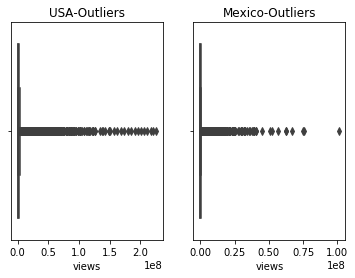

In [1]:
import YouTube_Data_Wrangling as dw
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter


In [2]:
#####DATA STORY####
#Q1: How is the viewership divided among the 16 categories in Mexico and USA. 
#Q2: What did viewers in Mexico watch in 2017/2018 and did they watch same content again or chose different content (views vs unique videos)
#Q3: What did viewers in USA watch in 2017/2018 and did they watch same content again or chose different content (views vs unique videos)
#Q4: How did viewership changed from 2017 to 2018 in USA/Mexico per category? Did any specific video did very well in any category?
#Q5: Is there relationship between views and likes/dislikes? How is it different in two countries


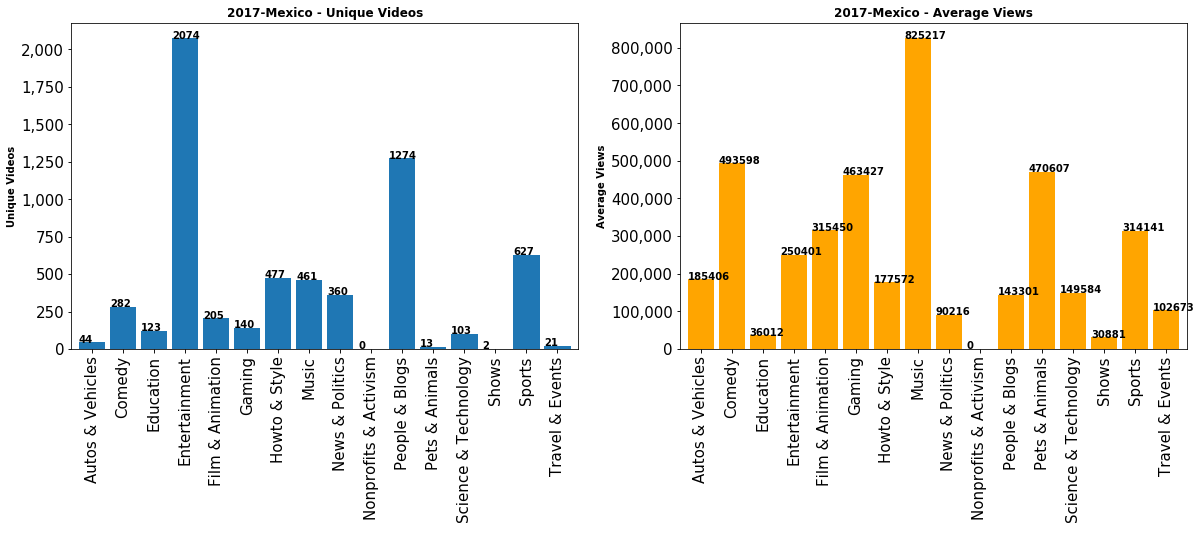

In [3]:
title_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name']]
title_df['trending_date']=title_df['trending_date'].dt.year
title_df_drop=title_df.drop_duplicates()
title_df_drop
title_unique_count=title_df_drop.groupby(['trending_date','category_name','country'])['title'].count().unstack('category_name')
title_df=title_unique_count
title_df=title_df.fillna(0)

df_2017_mx=title_df.loc[title_df.index[0]]
df_2017_usa=title_df.loc[title_df.index[1]]
df_2018_mx=title_df.loc[title_df.index[2]]
df_2018_usa=title_df.loc[title_df.index[3]]

views_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name','views']]
views_df['trending_date']=views_df['trending_date'].dt.year
views_df_drop=views_df.drop_duplicates()
views_mean_df=views_df_drop.groupby(['country','trending_date','category_name'])['views'].mean().unstack('category_name')

views_df_2017_mx=views_mean_df.loc[views_mean_df.index[0]] #Mexico2017
views_df_2018_mx=views_mean_df.loc[views_mean_df.index[1]]  #Mexico2018
views_df_2017_usa=views_mean_df.loc[views_mean_df.index[2]]   #USA2017
views_df_2018_usa=views_mean_df.loc[views_mean_df.index[3]]  #USA2018
col='orange'

###############  GRAPH   #############

#2017 Mexico Unique Videos vs Average Views
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

#Mexico 2017 Unique Videos
df_2017_mx.plot.bar(ax=axes[0],width=0.85)
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Unique Videos", weight='bold')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: format(int(y),','))) 
axes[0].set_title('2017-Mexico - Unique Videos', weight='bold')
axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)

for p in axes[0].patches:
    axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
    
         
#axes[0].set_ylim(0,8100)

#Mexico 2017 Average Views
views_df_2017_mx.plot.bar(ax=axes[1],width=0.85,color=col)
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Average Views", weight='bold')
axes[1].set_title('2017-Mexico - Average Views', weight='bold')
#axes[1].set_ylim(0,7400000)
axes[1].yaxis.set_major_formatter( FuncFormatter(lambda y, p: format(int(y),','))) 
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)

for p in axes[1].patches:
    axes[1].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
plt.savefig('Mexico2017-Unique-Ave.jpg',  bbox_inches = "tight")
##############

##Experimenting with getting max views from each cat in each country for each title for 2017 and 2018
#views_max_df=views_df_drop.groupby(['country','trending_date','category_name', 'title'])['views'].max().unstack(['category_name','trending_date', 'country'])

#views_max_df=views_max_df.fillna(0)

#views_max_df.loc['Total']=views_max_df.sum()
#views_total=views_max_df.loc['Total']

#new_df={}
#for i in list(views_total.index):
    #j=i.split(',')
    #new_df[j[1]]=[j[2],j[0]]
    


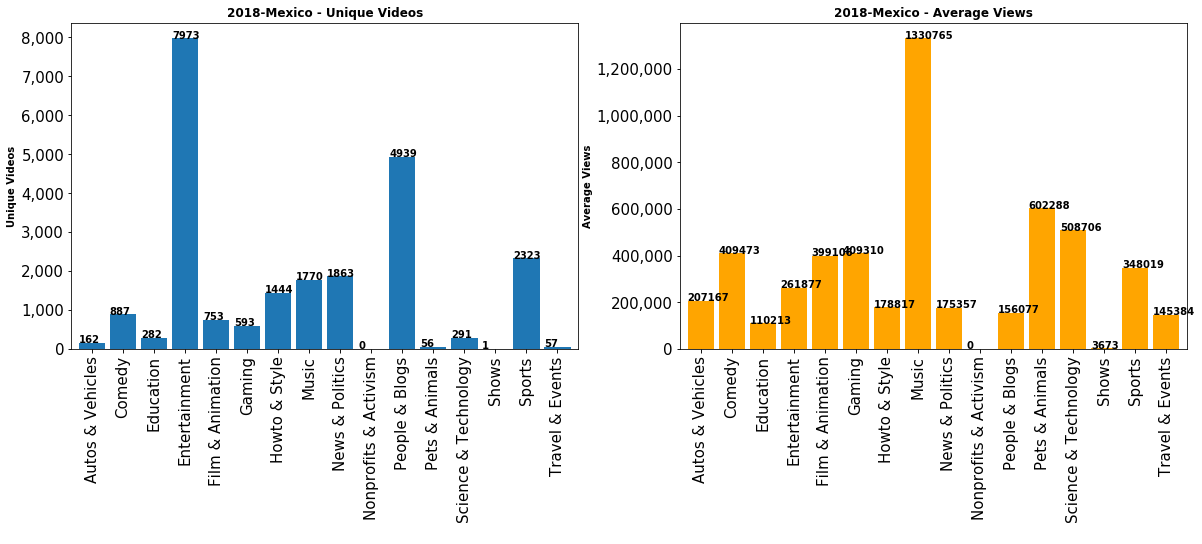

In [4]:
#2018 Mexico Unique Videos vs Average Views
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

#Mexico 2018 Unique Videos

df_2018_mx.plot.bar(ax=axes[0],width=0.85)
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Unique Videos", weight='bold')
axes[0].set_title('2018-Mexico - Unique Videos', weight='bold')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[0].set_ylim(0,8100)

#Mexico 2018 Average Views
views_df_2018_mx.plot.bar(ax=axes[1],width=0.85,color=col)
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Average Views", weight='bold')
axes[1].set_title('2018-Mexico - Average Views', weight='bold')
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[1].set_ylim(0,7400000)

axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)



for p in axes[0].patches:
    axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
for p in axes[1].patches:
    axes[1].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')

plt.savefig('Mexico2018-Unique-Ave.jpg',  bbox_inches = "tight")
##############

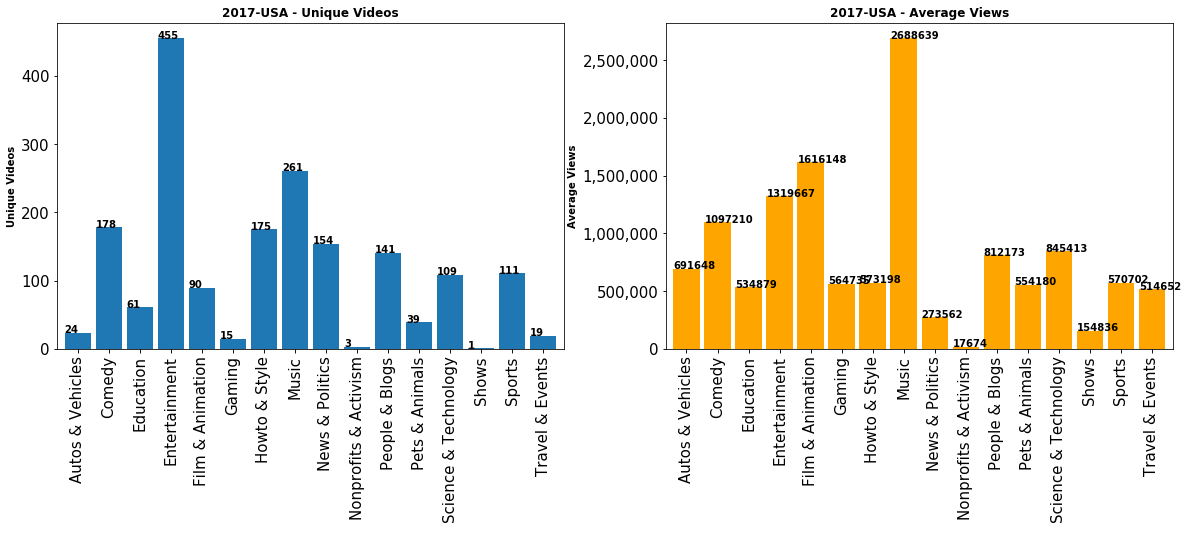

In [5]:
#2017 USA Unique Videos vs Average Views
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

#USA 2017 Unique Videos

df_2017_usa.plot.bar(ax=axes[0],width=0.85)
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Unique Videos", weight='bold')
axes[0].set_title('2017-USA - Unique Videos', weight='bold')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[0].set_ylim(0,8100)

#USA 2017 Average Views
views_df_2017_usa.plot.bar(ax=axes[1],width=0.85,color=col)
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Average Views", weight='bold')
axes[1].set_title('2017-USA - Average Views', weight='bold')
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[1].set_ylim(0,7400000)

axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)


for p in axes[0].patches:
    axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
for p in axes[1].patches:
    axes[1].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')

plt.savefig('USA2017-Unique-Ave.jpg',  bbox_inches = "tight")
##############

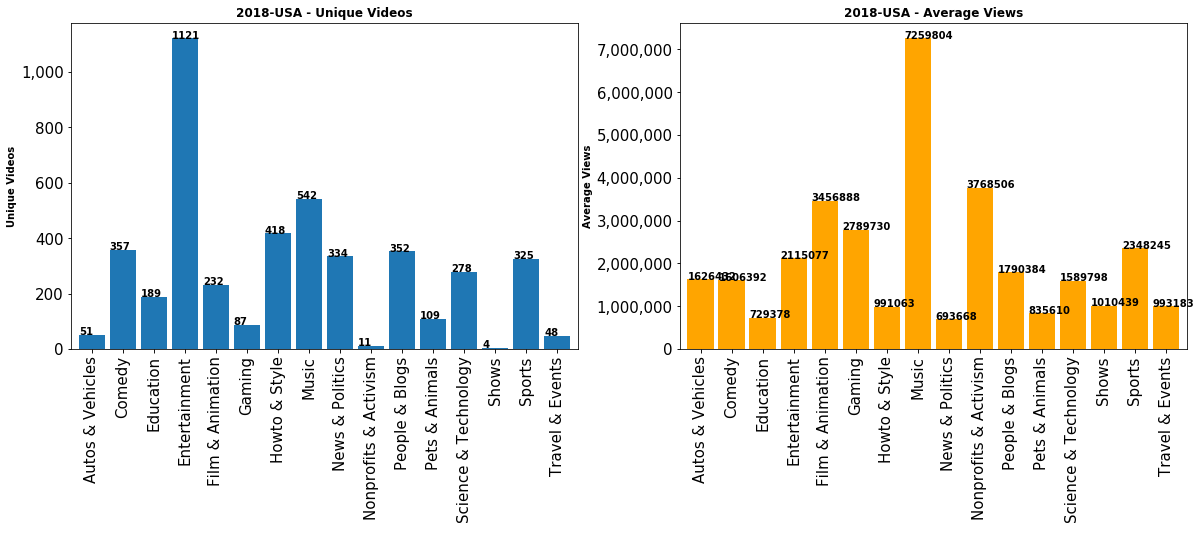

In [6]:
#2018 USA Unique Videos vs Average Views
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

#USA 2018 Unique Videos

df_2018_usa.plot.bar(ax=axes[0],width=0.85)

axes[0].set_xlabel(" ")
axes[0].set_ylabel("Unique Videos", weight='bold')
axes[0].set_title('2018-USA - Unique Videos', weight='bold')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[0].set_ylim(0,8100)

#USA 2018 Average Views
views_df_2018_usa.plot.bar(ax=axes[1],width=0.85,color=col)

axes[1].set_xlabel(" ")
axes[1].set_ylabel("Average Views", weight='bold')
axes[1].set_title('2018-USA - Average Views', weight='bold')
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[1].set_ylim(0,7400000)

axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)

for p in axes[0].patches:
    axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
for p in axes[1].patches:
    axes[1].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')


plt.savefig('USA2018-Unique-Ave.jpg', bbox_inches = "tight")
##############

In [7]:
#Mexico-Difference in mean number of views from 2017 and 2018
#Mexico - PCT change in views from 2017 and 2018

#df_mx_201718_av_views=pd.concat([views_mean_df.loc[views_mean_df.index[0]],views_mean_df.loc[views_mean_df.index[1]]],axis=1)

#df_mx_201718_av_views.columns

#df_mx_201718_av_diff_views=df_mx_201718_av_views[('Mexico', 2018)] - df_mx_201718_av_views[('Mexico', 2017) ]
#df_mx_201718_av_diff_views

#df_mx_201718_av_views.fillna(0, inplace=True)
#df_mx_201718_av_views_pct=df_mx_201718_av_views.pct_change(axis='columns')
#df_mx_201718_av_views_pct

#fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#df_mx_201718_av_diff_views.plot.bar(ax = axes[0],width=0.25)
#axes[0].set_xlabel(" ")
#axes[0].set_ylabel("Difference in views between 2017 and 2018")
#axes[0].set_title('Mexico')
#axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[0].legend().remove()
#df_mx_201718_av_views_pct.plot.bar(ax = axes[1])
#axes[1].set_xlabel(" ")
#axes[1].set_ylabel("Percentage Change in views between 2017 and 2018")
#axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
#plt.legend().remove()
#axes[1].set_title('Mexico')

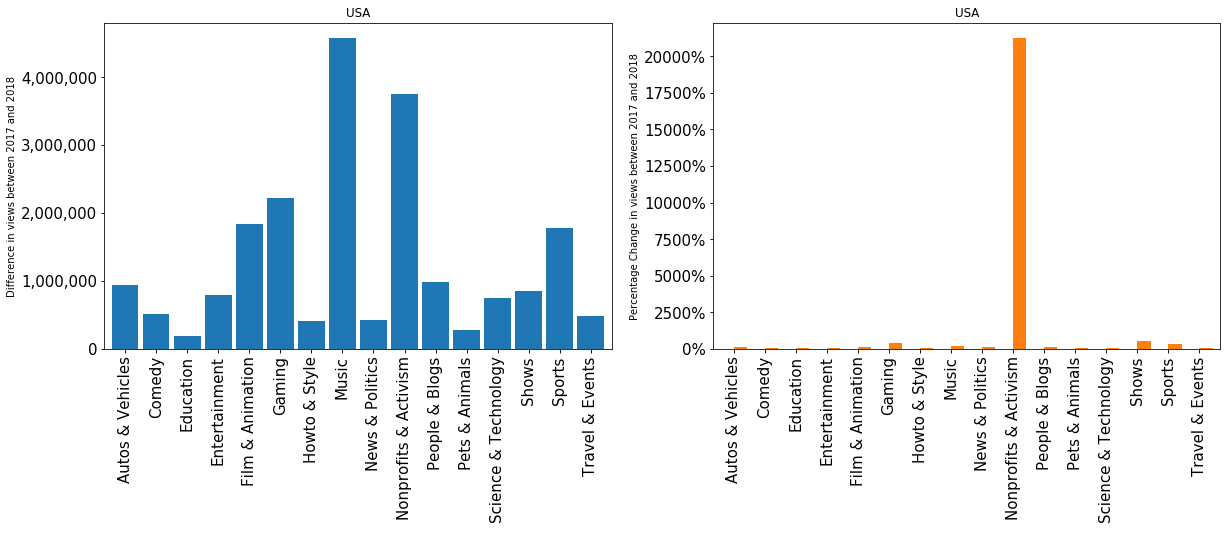

In [8]:
#WITH NONPROF
#USA-Difference in mean number of views from 2017 and 2018
#USA - PCT change in views from 2017 and 2018

df_usa_201718_av_views=pd.concat([views_mean_df.loc[views_mean_df.index[2]],views_mean_df.loc[views_mean_df.index[3]]],axis=1)
#views_mean_df
#df_usa_201718_av_views

df_usa_201718_av_diff_views=df_usa_201718_av_views[('USA', 2018)] - df_usa_201718_av_views[('USA', 2017) ]
df_usa_201718_av_diff_views

df_usa_201718_av_views.fillna(0, inplace=True)
df_usa_201718_av_views_pct=df_usa_201718_av_views.pct_change(axis='columns')
df_usa_201718_av_views_pct
###########
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
df_usa_201718_av_diff_views.plot.bar(ax = axes[0],width=0.85)

axes[0].set_ylabel("Difference in views between 2017 and 2018")
axes[0].set_xlabel(" ")
axes[0].set_title('USA')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
axes[0].legend().remove()

df_usa_201718_av_views_pct.plot.bar(ax = axes[1], width=0.85)

axes[1].set_xlabel(" ")
axes[1].set_ylabel("Percentage Change in views between 2017 and 2018")
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
axes[1].legend().remove()
axes[1].set_title('USA')

axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)

plt.savefig('USA-with-noprofits.jpg', bbox_inches = "tight")

In [9]:
#The view for category "Nonprofits & Activism" increased by 20,000%, as can ve seen by above graph. In order to see how other
#categories changed, "Nonprofits & Activism" category can be dropped. 
#Q: What caused 'nonprofits and Activism' increase by 20,000%

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


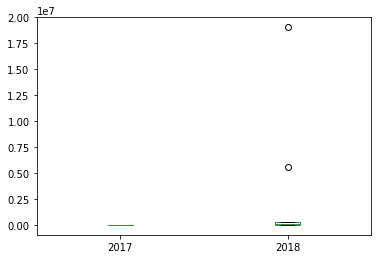

In [10]:

nonprof_df=dw.combined_usa_mx_df[dw.combined_usa_mx_df.category_name=='Nonprofits & Activism']
nonprof_df['trending_date']=nonprof_df['trending_date'].dt.year
nonprof_df_drop=nonprof_df.drop_duplicates()
nonprof_df.reset_index(drop=True,inplace=True)
nonprof_df.groupby(['trending_date','title'])['views'].mean().unstack('trending_date').plot.box()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

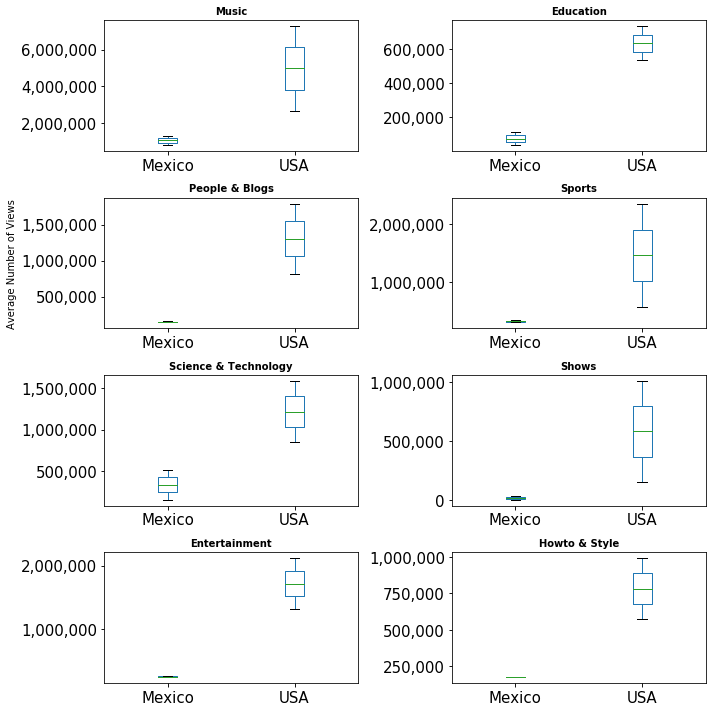

In [11]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,10))

music_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='Music')]
music_df['trending_date']=music_df['trending_date'].dt.year
music_df_drop=music_df.drop_duplicates()
music_df.reset_index(drop=True,inplace=True)

music_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[0][0])
#axes[0][0].set_ylabel("Average Number of Views")
axes[0][0].set_title('Music',fontsize=10,weight="bold")

#########
edu_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='Education')]
edu_df['trending_date']=edu_df['trending_date'].dt.year
edu_df_drop=edu_df.drop_duplicates()
edu_df.reset_index(drop=True,inplace=True)

edu_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[0][1])
axes[0][1].set_title('Education',fontsize=10,weight="bold")

######
people_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='People & Blogs')]
people_df['trending_date']=people_df['trending_date'].dt.year
people_df_drop=people_df.drop_duplicates()
people_df.reset_index(drop=True,inplace=True)

people_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[1][0])
axes[1][0].set_title('People & Blogs',fontsize=10,weight="bold")
axes[1][0].set_ylabel("Average Number of Views")

####
sports_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='Sports')]
sports_df['trending_date']=sports_df['trending_date'].dt.year
sports_df_drop=sports_df.drop_duplicates()
sports_df.reset_index(drop=True,inplace=True)

sports_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[1][1])
axes[1][1].set_title('Sports',fontsize=10,weight="bold")

#####

sci_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='Science & Technology')]
sci_df['trending_date']=sci_df['trending_date'].dt.year
sci_df_drop=sports_df.drop_duplicates()
sci_df.reset_index(drop=True,inplace=True)

sci_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[2][0])
axes[2][0].set_title('Science & Technology',fontsize=10,weight="bold")
################

shows_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='Shows')]
shows_df['trending_date']=shows_df['trending_date'].dt.year
shows_df_drop=sports_df.drop_duplicates()
shows_df.reset_index(drop=True,inplace=True)

shows_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[2][1])
axes[2][1].set_title('Shows',fontsize=10,weight="bold")
#######

ent_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='Entertainment')]
ent_df['trending_date']=ent_df['trending_date'].dt.year
ent_df_drop=ent_df.drop_duplicates()
ent_df.reset_index(drop=True,inplace=True)

ent_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[3][0])
axes[3][0].set_title('Entertainment',fontsize=10,weight="bold")

########
how_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name=='Howto & Style')]
how_df['trending_date']=how_df['trending_date'].dt.year
how_df_drop=ent_df.drop_duplicates()
how_df.reset_index(drop=True,inplace=True)

how_df.groupby(['trending_date','country'])['views'].mean().unstack('country').plot.box(ax=axes[3][1])
axes[3][1].set_title('Howto & Style',fontsize=10,weight="bold")

########
axes[0][0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0][0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1][0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1][0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[0][1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0][1].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1][1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1][1].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[2][0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[2][0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[2][1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[2][1].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[3][0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[3][0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[3][1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[3][1].yaxis.set_tick_params(labelsize=15, width=0.9)

axes[0][0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
axes[0][1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
axes[1][0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
axes[1][1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
axes[2][1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
axes[2][0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
axes[3][0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),',')))
axes[3][1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 



plt.tight_layout()
plt.savefig('Boxplots.jpg', bbox_inches = "tight")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


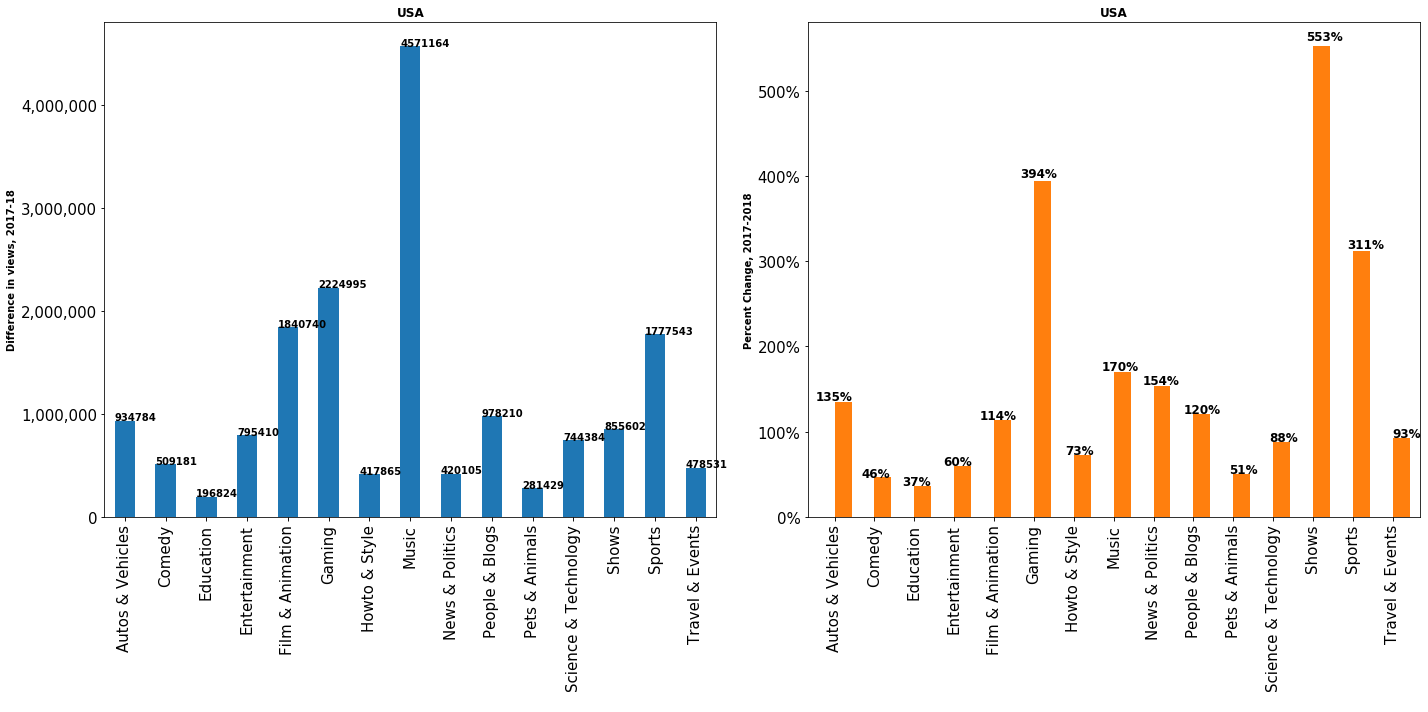

In [12]:
#WITHOUT NONPROF
#USA & Mexico -Difference in mean number of views (without nonprof) from 2017 and 2018
#USA & Mexico - PCT change in views(without nonprof) from 2017 and 2018

views_nonprof_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name','views']]
views_nonprof_df['trending_date']=pd.to_datetime(views_nonprof_df['trending_date'])
views_nonprof_df['trending_date']=views_nonprof_df['trending_date'].dt.year


views_nonprof_df_drop=views_nonprof_df[views_nonprof_df.category_name!='Nonprofits & Activism']

views_mean_no_nonprof_df=views_nonprof_df_drop.groupby(['country','trending_date','category_name'])['views'].mean().unstack('category_name')
#views_mean_no_nonprof_df

df_usa_no_nonprof_201718_av_views=pd.concat([views_mean_no_nonprof_df.loc[views_mean_no_nonprof_df.index[2]],views_mean_no_nonprof_df.loc[views_mean_df.index[3]]],axis=1)
df_mx_no_nonprof_201718_av_views=pd.concat([views_mean_no_nonprof_df.loc[views_mean_no_nonprof_df.index[0]],views_mean_no_nonprof_df.loc[views_mean_df.index[1]]],axis=1)

df_usa_no_nonprof_201718_av_diff_views=df_usa_no_nonprof_201718_av_views[('USA', 2018)] - df_usa_no_nonprof_201718_av_views[('USA', 2017) ]
#df_usa_no_nonprof_201718_av_diff_views

df_mx_no_nonprof_201718_av_diff_views=df_mx_no_nonprof_201718_av_views[('Mexico', 2018)] - df_mx_no_nonprof_201718_av_views[('Mexico', 2017) ]


df_usa_no_nonprof_201718_av_diff_views.fillna(0, inplace=True)

df_usa_no_nonprof_201718_av_views_pct=df_usa_no_nonprof_201718_av_views.pct_change(axis='columns')
#df_usa_no_nonprof_201718_av_views_pct

df_mx_no_nonprof_201718_av_diff_views.fillna(0, inplace=True)

df_mx_no_nonprof_201718_av_views_pct=df_mx_no_nonprof_201718_av_views.pct_change(axis='columns')
#df_mx_no_nonprof_201718_av_views_pct

### GRAPHS:

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

df_usa_no_nonprof_201718_av_diff_views.plot.bar(ax = axes[0],width=0.5)

axes[0].set_ylabel("Difference in views, 2017-18",weight="bold")
axes[0].set_xlabel(" ")
axes[0].set_title('USA',weight="bold")
                     
axes[0].legend().remove()

axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 
#axes[0][0].tick_params(labelsize=20)

df_usa_no_nonprof_201718_av_views_pct.plot.bar(ax = axes[1], width=0.85)

axes[1].set_xlabel(" ")
axes[1].set_ylabel("Percent Change, 2017-2018",weight="bold")
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
axes[1].set_title('USA',weight="bold")

axes[1].legend().remove()
#axes[0][1].tick_params(labelsize=20)


######


axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)

for p in axes[0].patches:
    axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')

for p in axes[1].patches:
    
    x_value= p.get_x() + p.get_width() / 2
    
    if p.get_height() == 0:
        axes[1].annotate((' '), (p.get_x(), p.get_height()), weight='bold', size=12, textcoords="offset points", ha='center')

    else:
        axes[1].annotate(('{:.0%}'.format(p.get_height())), (p.get_x(), p.get_height()), weight='bold', size=12, textcoords="offset points", ha='center')


plt.tight_layout()

plt.savefig('Difference-in-views-Without-Nonprofits-USA.jpg', bbox_inches = "tight")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


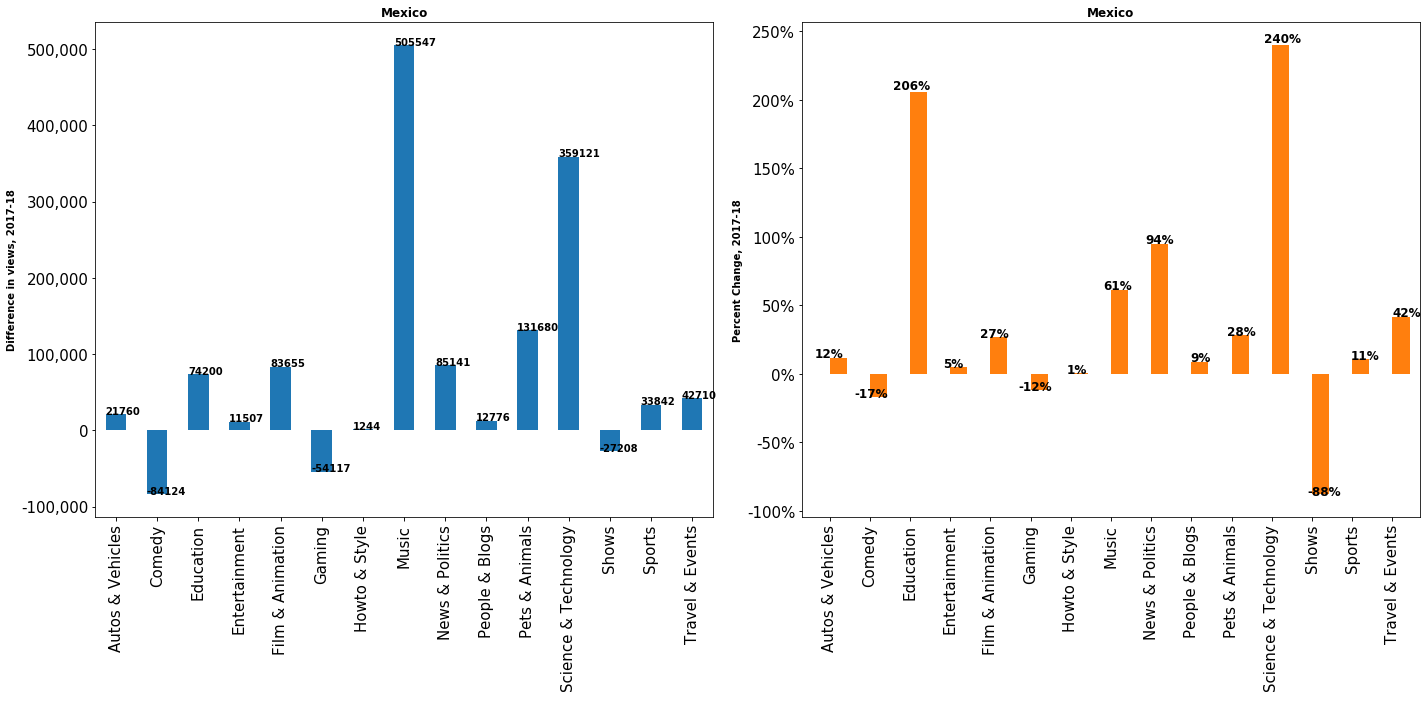

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
df_mx_no_nonprof_201718_av_diff_views.plot.bar(ax = axes[0],width=0.5)

axes[0].set_ylabel("Difference in views, 2017-18",weight="bold")
axes[0].set_xlabel(" ")
axes[0].set_title('Mexico',weight="bold")
axes[0].legend().remove()
#axes[1][0].tick_params(labelsize=20)
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),','))) 


df_mx_no_nonprof_201718_av_views_pct.plot.bar(ax = axes[1], width=0.85)

axes[1].set_xlabel(" ")
axes[1].set_ylabel("Percent Change, 2017-18",weight="bold")
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.legend().remove()
axes[1].set_title('Mexico',weight="bold")
#axes[1][1].tick_params(labelsize=20)

axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)

for p in axes[0].patches:
    axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
for p in axes[1].patches:
    
    x_value= p.get_x() + p.get_width() / 2
    
    if p.get_height() == 0:
        axes[1].annotate((' '), (p.get_x(), p.get_height()), weight='bold', size=12, textcoords="offset points", ha='center')

    else:
        axes[1].annotate(('{:.0%}'.format(p.get_height())), (p.get_x(), p.get_height()), weight='bold', size=12, textcoords="offset points", ha='center')

    

plt.tight_layout()

plt.savefig('Difference-in-views-Without-Nonprofits-MX.jpg', bbox_inches = "tight")


In [19]:
views_dlikes_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name','views','likes','dislikes','comment_count']]
views_dlikes_df['trending_date']=views_dlikes_df['trending_date'].dt.year
views_dlikes_df_drop=views_dlikes_df.drop_duplicates()
views_dlikes_df_drop
views_dlikes_unique_count=views_dlikes_df_drop.groupby(['category_name','country'])[['views','likes','dislikes','comment_count']].mean().unstack('country')
views_dlikes_df=views_dlikes_unique_count
views_dlikes_df=views_dlikes_df.fillna(0)
views_dlikes_df


corr = views_dlikes_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#plt.savefig('correlations.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


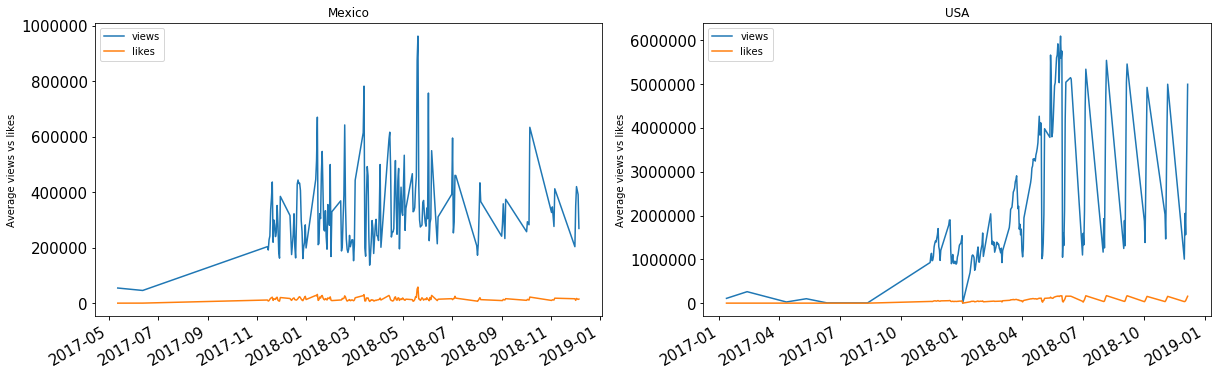

In [21]:
views_analysis=dw.combined_usa_mx_df.loc[:,['trending_date','country','category_name','views','likes']]
views_analysis_drop=views_analysis[views_analysis.category_name!='Nonprofits & Activism']

views_analysis_mon_df=views_analysis_drop

#views_analysis_mon_df['trending_date']=views_analysis_drop['trending_date'].dt.month

views_analysis_mon_mx_df=views_analysis_mon_df.loc[views_analysis_mon_df.country=='Mexico']
views_analysis_mon_usa_df=views_analysis_mon_df.loc[views_analysis_mon_df.country=='USA']

df_mx=views_analysis_mon_mx_df.groupby(['trending_date'])['views','likes'].mean()

df_usa=views_analysis_mon_usa_df.groupby(['trending_date'])['views','likes'].mean()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

df_mx.plot(ax = axes[0])

axes[0].set_ylabel("Average views vs likes")
axes[0].set_xlabel(" ")
axes[0].set_title('Mexico')
axes[0].legend(loc='upper left')


df_usa.plot(ax = axes[1])
axes[1].set_ylabel("Average views vs likes")
axes[1].set_xlabel(" ")
axes[1].set_title('USA')
axes[1].legend(loc='upper left')

axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)


plt.savefig('views-vs-likes.jpg', bbox_inches = "tight")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


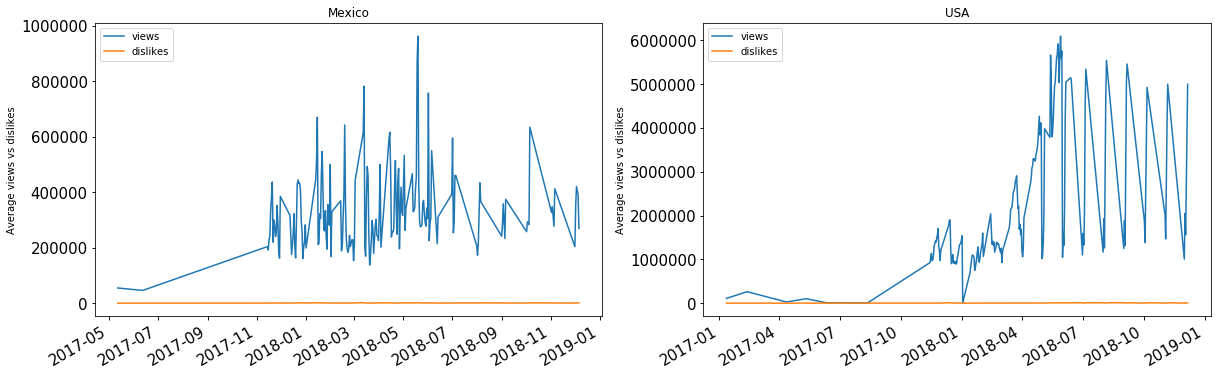

In [20]:
views_analysis_dis=dw.combined_usa_mx_df.loc[:,['trending_date','country','category_name','views','dislikes']]
views_analysis_dis_drop=views_analysis_dis[views_analysis.category_name!='Nonprofits & Activism']

views_analysis_mon_dis_df=views_analysis_dis_drop

#views_analysis_mon_df['trending_date']=views_analysis_drop['trending_date'].dt.month

views_analysis_mon_dis_mx_df=views_analysis_mon_dis_df.loc[views_analysis_mon_dis_df.country=='Mexico']
views_analysis_mon_dis_usa_df=views_analysis_mon_dis_df.loc[views_analysis_mon_dis_df.country=='USA']

df_mx_dis=views_analysis_mon_dis_mx_df.groupby(['trending_date'])['views','dislikes'].mean()

df_usa_dis=views_analysis_mon_dis_usa_df.groupby(['trending_date'])['views','dislikes'].mean()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))

df_mx_dis.plot(ax = axes[0])

axes[0].set_ylabel("Average views vs dislikes")
axes[0].set_xlabel(" ")
axes[0].set_title('Mexico')
axes[0].legend(loc='upper left')


df_usa_dis.plot(ax = axes[1])
axes[1].set_ylabel("Average views vs dislikes")
axes[1].set_xlabel(" ")
axes[1].set_title('USA')
axes[1].legend(loc='upper left')

axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)

plt.savefig('views-vs-dislikes.jpg', bbox_inches = "tight")